In [1]:
import os
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
# list output files
file_paths = os.listdir(os.path.join('data', 'results'))
# keep only .csv files
results = [pd.read_csv(os.path.join('data', 'results', p)) for p in file_paths if p.endswith('.csv')]

In [3]:
results = pd.concat(results)

In [4]:
results['mean_auc'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['auroc'].transform('mean')
results['mean_f1'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['f1_score'].transform('mean')

In [5]:
results

,reduction_name,score_key,state,fold,auroc,tpr,fpr,f1_score,oob_score,train_split,test_split,test_classes,dataset,mean_auc,mean_f1
0,mofa,lr_means,0,0,0.944444,[0. 0.33333333 0.66666667 1. 1...,[0. 0. 0. 0.33333333 1...,0.828571,0.300000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.672870,0.620291
1,tensor,lr_means,0,0,1.000000,[0. 0.33333333 1. 1. ],[0. 0. 0. 1.],0.828571,0.600000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.904630,0.642540
2,mofa,expr_prod,0,0,0.888889,[0. 0.66666667 0.66666667 1. 1...,[0. 0. 0.33333333 0.33333333 1...,0.828571,0.400000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.703426,0.596984
3,tensor,expr_prod,0,0,0.666667,[0. 0. 1. 1.],[0. 0.33333333 0.33333333 1. ],0.828571,0.300000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.629167,0.550265
4,mofa,lr_logfc,0,0,0.777778,[0. 0.33333333 0.66666667 0.66666667 1...,[0. 0. 0. 0.66666667 0...,0.828571,0.600000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.752407,0.543492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,tensor,lrscore,4,2,0.350694,[0. 0. 0. 0.04166667 0...,[0. 0.05555556 0.16666667 0.16666667 0...,0.402399,0.535714,[ 0 1 2 3 4 5 7 8 9 10 11 ...,[ 6 13 17 22 24 30 32 34 40 43 45 ...,[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0...,reichart,0.571878,0.521114
176,mofa,lr_probs,4,2,1.000000,[0. 0.04166667 0.125 0.25 0...,[0. 0. 0. 0. 0...,1.000000,0.892857,[ 0 1 2 3 4 5 7 8 9 10 11 ...,[ 6 13 17 22 24 30 32 34 40 43 45 ...,[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0...,reichart,0.981823,0.925682
177,tensor,lr_probs,4,2,0.870370,[0. 0.04166667 0.125 0.20833333 0...,[0. 0. 0. 0. 0...,0.810396,0.797619,[ 0 1 2 3 4 5 7 8 9 10 11 ...,[ 6 13 17 22 24 30 32 34 40 43 45 ...,[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0...,reichart,0.846928,0.775045
178,mofa,magnitude_rank,4,2,1.000000,[0. 0.04166667 0.08333333 0.16666667 0...,[0. 0. 0. 0. 0...,0.976259,0.892857,[ 0 1 2 3 4 5 7 8 9 10 11 ...,[ 6 13 17 22 24 30 32 34 40 43 45 ...,[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0...,reichart,0.976965,0.913113


In [6]:
results['score_key'].unique()

remap_dict = {'lr_means':'CellPhoneDB',
              'expr_prod':'Product',
              'lr_logfc': 'logFC',
              'lrscore': 'SingleCellSignalR',
              'lr_probs': 'CellChat',
              'magnitude_rank':'Consensus'}
results['score_key'] = results['score_key'].map(remap_dict)

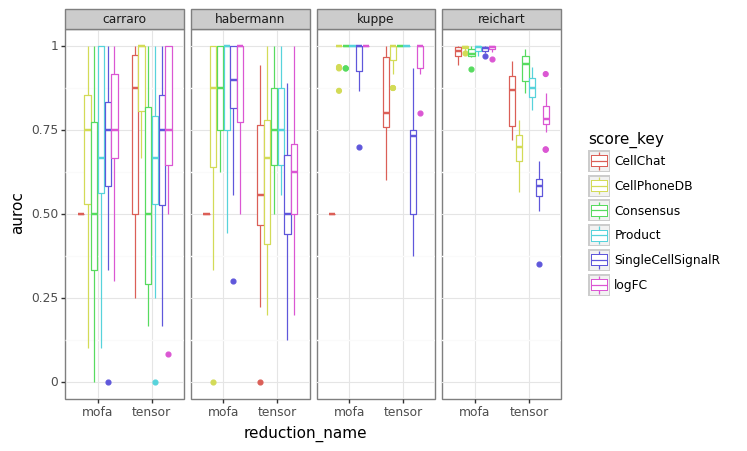

<ggplot: (8781267156860)>

In [7]:
## plot results as boxplots by reduction_name & score_key
p9.ggplot(results, p9.aes(x='reduction_name', y='auroc', color='score_key')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset')

In [8]:
metric = 'mean_auc'

In [9]:
results = results[['reduction_name', 'score_key', 'mean_auc', 'mean_f1', 'dataset']].drop_duplicates()

In [10]:
results['rank'] = results.groupby(['dataset', 'reduction_name'])[metric].rank(ascending=False, method='average').astype('int')

In [11]:
results.head()

,reduction_name,score_key,mean_auc,mean_f1,dataset,rank
0,mofa,CellPhoneDB,0.672870,0.620291,carraro,4
1,tensor,CellPhoneDB,0.904630,0.642540,carraro,1
2,mofa,Product,0.703426,0.596984,carraro,2
3,tensor,Product,0.629167,0.550265,carraro,5
4,mofa,logFC,0.752407,0.543492,carraro,1


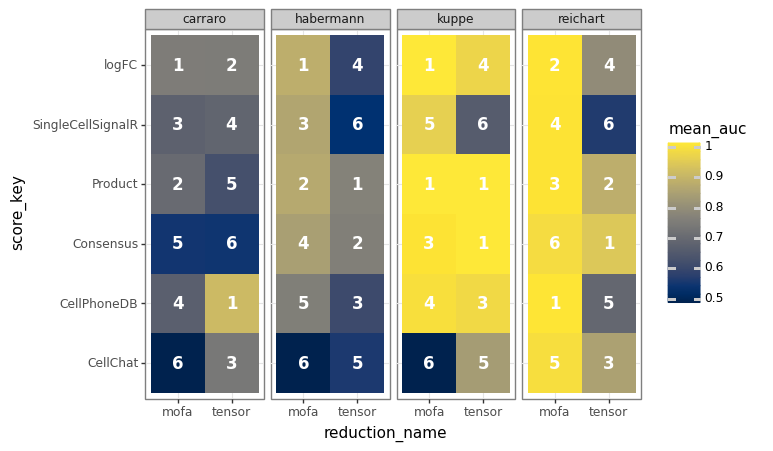

<ggplot: (8781264668171)>

In [12]:
## mosaic plot
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_auc')) + \
    p9.geom_tile() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset') + \
    p9.scale_fill_cmap(limits=(0.5, 1), cmap_name='cividis') + \
    p9.geom_text(p9.aes(label='rank'), size=12, color='white', fontweight='bold')

In [ ]:
dimred_results = results.groupby(['reduction_name', 'score_key']).mean().reset_index()

In [ ]:
## scatter plot by reduction_name
p9.ggplot(dimred_results, p9.aes(x='mean_auc', y='mean_f1', color='score_key', shape='reduction_name')) + \
    p9.geom_point(size=5) + \
        p9.theme_bw()

In [ ]:
import scanpy as sc

In [ ]:
adata = sc.read_h5ad("data/results/carraro_dimred.h5ad")

In [ ]:
adata